In [48]:
import math
import numpy as np
import matplotlib.pyplot as plt
from gasp import ssfp, responses, simulation, dataset

Data: 20231106_GASP_PHANTOM data exists
pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


(128, 128, 8, 16, 3)


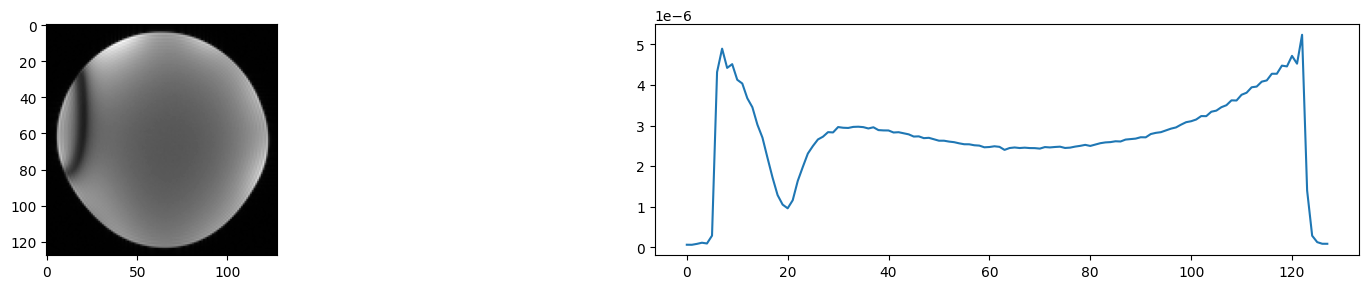

In [50]:
M90 = dataset.load_dataset7a()
M90 = M90[64:192, 64:192, : ,: ,:]
M90 = M90[:,:,:,::1,:]
print(M90.shape)
simulation.view_gasp_input(M90, [0,0])

Data: 20231106_GASP_PHANTOM data exists
pymapVBVD version 0.5.6
Software version: VB
Scan 1/1, read all mdhs:   0%|          | 0.00/265M [00:00<?, ?B/s]

pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


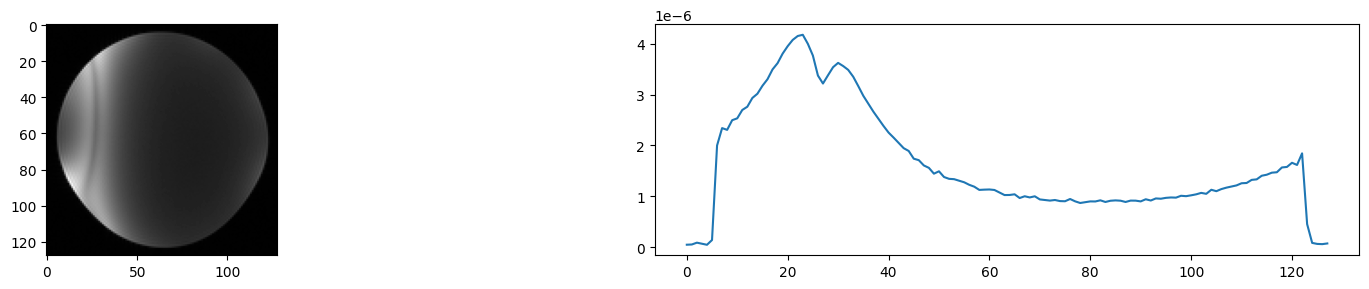

In [51]:
M20 = dataset.load_dataset7b()
M20 = M20[64:192, 64:192, : ,: ,:]
M20 = M20[:,:,:,::1,:]
M20.shape 
simulation.view_gasp_input(M20, [0,0])

In [52]:
M_knee_90 = dataset.load_dataset8a()
M_knee_90 = M_knee_90[64:192, 64:192, : ,: ,:]
M_knee_90 = M_knee_90[:,:,:,::1,:]
print(M_knee_90.shape)

Data: 20231106_GASP_KNEE data exists
pymapVBVD version 0.5.6
Software version: VB
Scan 1/1, read all mdhs:   0%|          | 0.00/133M [00:00<?, ?B/s]

pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


(128, 128, 8, 16, 3)


In [53]:
M_knee_20 = dataset.load_dataset8b()
M_knee_20 = M_knee_20[64:192, 64:192, : ,: ,:]
M_knee_20 = M_knee_20[:,:,:,::1,:]
print(M_knee_20.shape)

Data: 20231106_GASP_KNEE data exists
pymapVBVD version 0.5.6
Software version: VB
Scan 1/1, read all mdhs:   0%|          | 0.00/133M [00:00<?, ?B/s]

pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


(128, 128, 8, 16, 3)


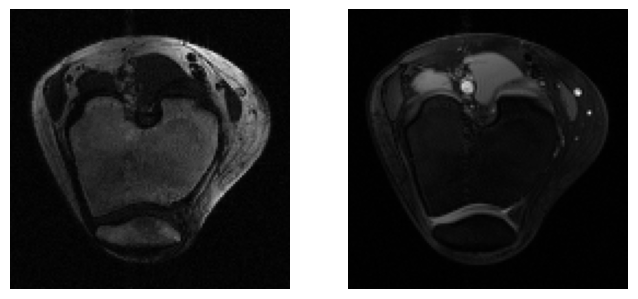

In [54]:
width = 128
bw = 0.4
M_train = M20
M_data = M_knee_20
D0 = responses.gaussian(width, bw=bw, shift=-0.3) 
D1 = responses.gaussian(width, bw=bw, shift=0.1)
G0, A0 = simulation.train_gasp(M_train, D0, clines=16)    
G1, A1 = simulation.train_gasp(M_train, D1, clines=16)    

def evaluate_gasp(M, A):
    Ic = []
    for cc in range(M.shape[2]):
        Mc = M[:,:,cc,:,:]
        Mc = np.reshape(Mc,(Mc.shape[0], Mc.shape[0], -1))
        _I = simulation.evaluate_gasp(Mc, A[cc])
        Ic.append(_I)
    Ic = np.array(Ic)
    Ic = np.sqrt(np.sum(np.abs(Ic)**2, axis=0))
    return Ic

results0 = evaluate_gasp(M_data, A0)
results1 = evaluate_gasp(M_data, A1)

f = plt.figure(figsize=(8,8))
ax = f.add_subplot(2, 2, 1)
ax2 = f.add_subplot(2, 2, 2)
ax.imshow(results0, cmap='gray')
ax.axis('off')
ax2.imshow(results1, cmap='gray')
ax2.axis('off')
plt.show()

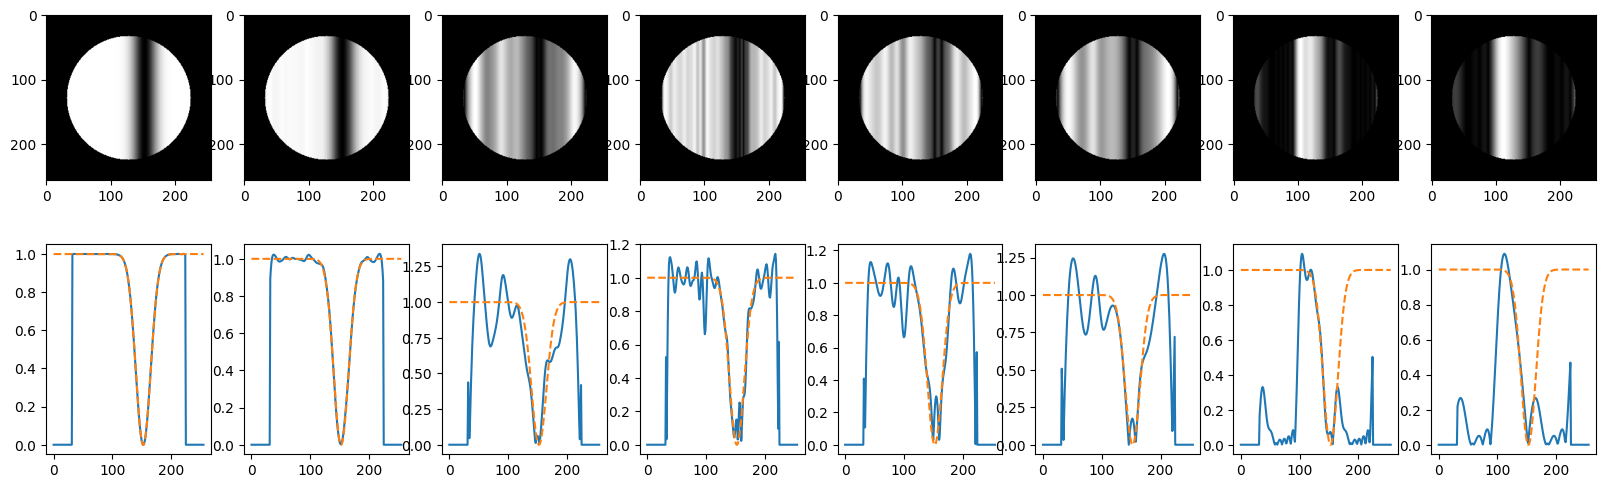

In [55]:
width = 256
height = 256
npcs = 16
alpha = np.deg2rad(60)
gradient = 2 * np.pi
phantom_type = 'circle'
D = responses.notch(width, bw=0.2, shift=0.1)

P = [{ 'npcs':16, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':8, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':4, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':16, 'TRs':[5e-3, 10e-3] },
     { 'npcs':8, 'TRs':[5e-3, 10e-3] },
     { 'npcs':4, 'TRs':[5e-3, 10e-3] },
     { 'npcs':16, 'TRs':[5e-3] },
     { 'npcs':8, 'TRs':[5e-3] }]

G = []
A = []
for p in P:
    M = simulation.simulate_ssfp(width=width, height=height, npcs=p['npcs'], TRs=p['TRs'], alpha = alpha, gradient = gradient, phantom_type=phantom_type)
    Ic, M, An = simulation.simulate_gasp(D, npcs=p['npcs'], TRs=p['TRs'], alpha = alpha, gradient = gradient, phantom_type=phantom_type)
    G.append(Ic)
    A.append(An)

D = [D, D, D, D, D, D, D, D]
simulation.view_gasp_comparison(G, D)